In [1]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

# Load in the Data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target ctarget  
0       0       r  
1       0       r  
2       0       r  
3       0       r  
4       0       r

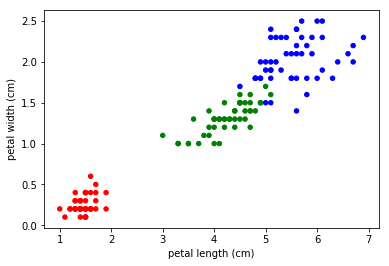

In [5]:
## Load in the data
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

## Apply a 'color map' for plotting purposes
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])

## Do some plotting to illustrate the data
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
irisdf.head()

In [6]:
irisdf.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [8]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1
    
predictions = irisdf.apply(my_classifier, axis=1)

In [9]:
irisdf['predictions'] = predictions

print(float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

0.6666666666666666


### Starter Code

Work on improving the classifier below.

In [10]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 2
    
    ## Fill in other if then statements here by looking at the plot and data above

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print(float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

0.6666666666666666


### Using distance: KNN implementation

In [ ]:
#zip: list(zip(first, second))

x = [1,2,3]
y = [a, b, c]

list(zip(x, y))

for i in zip(x, y):
    print (i)

In [12]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X, y)

print(pd.DataFrame(list(zip(knn.predict(X), y)), columns = ['predicted','actual']))
print('Accuracy = {}'.format(knn.score(X, iris.target)))

     predicted  actual
0            0       0
1            0       0
2            0       0
3            0       0
4            0       0
5            0       0
6            0       0
7            0       0
8            0       0
9            0       0
10           0       0
11           0       0
12           0       0
13           0       0
14           0       0
15           0       0
16           0       0
17           0       0
18           0       0
19           0       0
20           0       0
21           0       0
22           0       0
23           0       0
24           0       0
25           0       0
26           0       0
27           0       0
28           0       0
29           0       0
..         ...     ...
120          2       2
121          2       2
122          2       2
123          2       2
124          2       2
125          2       2
126          2       2
127          2       2
128          2       2
129          2       2
130          2       2
131        

## Do we see a change when using more neighbors?

In [13]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X, y)

print (pd.DataFrame(list(zip(knn.predict(X), y)), columns = ['predicted','actual']))
print ('Accuracy = {}'.format(knn.score(X, iris.target)))

     predicted  actual
0            0       0
1            0       0
2            0       0
3            0       0
4            0       0
5            0       0
6            0       0
7            0       0
8            0       0
9            0       0
10           0       0
11           0       0
12           0       0
13           0       0
14           0       0
15           0       0
16           0       0
17           0       0
18           0       0
19           0       0
20           0       0
21           0       0
22           0       0
23           0       0
24           0       0
25           0       0
26           0       0
27           0       0
28           0       0
29           0       0
..         ...     ...
120          2       2
121          2       2
122          2       2
123          2       2
124          2       2
125          2       2
126          2       2
127          2       2
128          2       2
129          2       2
130          2       2
131        

## Do we see a change in performance when using the distance weight?

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(X, y)
print (knn.score(X, iris.target))

1.0


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [17]:
from sklearn.model_selection import GridSearchCV

## Parameters to tune!
tuned_parameters = [{'n_neighbors': [3, 5, 7],
                    'weights': ['distance','uniform']}]

## How many folds to use for validation?
n_folds = 5

knn = neighbors.KNeighborsClassifier()
grid_search = GridSearchCV(knn, tuned_parameters, cv = n_folds)
grid_search.fit(X, iris.target)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 7], 'weights': ['distance', 'uniform']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## What does this output?

In [18]:
grid_search.cv_results_

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.00055041, 0.00060692, 0.0009181 , 0.00061622, 0.00034871,
        0.00030766]),
 'mean_score_time': array([0.0009201 , 0.00067348, 0.00114713, 0.00100803, 0.00071225,
        0.00065012]),
 'mean_test_score': array([0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.98      ,
        0.98      ]),
 'mean_train_score': array([1.        , 0.96      , 1.        , 0.97      , 1.        ,
        0.97333333]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['distance', 'uniform', 'distance', 'uniform',
                    'distance', 'uniform'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighbors': 5, 'weights': 'distance'},
  {'

In [20]:
pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
4       0.000349         0.000712         0.980000          1.000000   
5       0.000308         0.000650         0.980000          0.973333   
3       0.000616         0.001008         0.973333          0.970000   
0       0.000550         0.000920         0.966667          1.000000   
1       0.000607         0.000673         0.966667          0.960000   
2       0.000918         0.001147         0.966667          1.000000   

  param_n_neighbors param_weights                                     params  \
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   
5                 7       uniform   {'n_neighbors': 7, 'weights': 'uniform'}   
3                 5       uniform   {'n_neighbors': 5, 'weights': 'uniform'}   
0                 3      distance  {'n_neighbors': 3, 'weights': 'distance'}   
1                 3       uniform   {'n_neighbors': 3, 'weights': 'uniform'}   
2                 5      distance  {'n_neighbors': 5, 'weights': 'distance'}   

   rank_test_score  split0_test_score  split0_train_score       ...         \
4                1           0.966667            1.000000       ...          
5                1           0.966667            0.966667       ...          
3                3           0.966667            0.966667       ...          
0                4           0.966667            1.000000       ...          
1                4           0.966667            0.958333       ...          
2                4           0.966667            1.000000       ...          

   split2_test_score  split2_train_score  split3_test_score  \
4           0.966667            1.000000           0.966667   
5           0.966667            0.975000           0.966667   
3           0.933333            0.975000           0.966667   
0           0.933333            1.000000           0.966667   
1           0.933333            0.966667           0.966667   
2           0.900000            1.000000           0.966667   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
4            1.000000                1.0            1.000000      0.000088   
5            0.983333                1.0            0.975000      0.000022   
3            0.975000                1.0            0.966667      0.000364   
0            1.000000                1.0            1.000000      0.000243   
1            0.966667                1.0            0.950000      0.000585   
2            1.000000                1.0            1.000000      0.000533   

   std_score_time  std_test_score  std_train_score  
4        0.000148        0.016330         0.000000  
5        0.000205        0.016330         0.006236  
3        0.000177        0.024944         0.004082  
0        0.000332        0.021082         0.000000  
1        0.000167        0.021082         0.006236  
2        0.000291        0.036515         0.000000  

[6 rows x 22 columns]

## What is our best test accuracy?  What do we expect our out of sample performance to look like? 

In [22]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

## Lets Build the model and look at it in more detail

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, iris.target)

knn_final = grid_search.best_estimator_
knn_final.fit(x_train, y_train)
preds = knn_final.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
import pprint
pp = pprint.PrettyPrinter(indent=4)
results = classification_report(y_pred=preds, y_true = y_test)
pp.pprint(results)

('             precision    recall  f1-score   support\n'
 '\n'
 '          0       1.00      1.00      1.00        13\n'
 '          1       0.89      0.89      0.89         9\n'
 '          2       0.94      0.94      0.94        16\n'
 '\n'
 'avg / total       0.95      0.95      0.95        38\n')


In [31]:
pd.DataFrame(list(zip(preds, y_test)), columns=['predicted', 'actual'])

predicted  actual
0           2       2
1           1       1
2           2       1
3           0       0
4           1       1
5           0       0
6           1       1
7           1       1
8           0       0
9           0       0
10          2       2
11          1       1
12          0       0
13          0       0
14          2       2
15          1       1
16          2       2
17          1       1
18          0       0
19          2       2
20          2       2
21          0       0
22          2       2
23          2       2
24          0       0
25          2       2
26          2       2
27          2       2
28          1       1
29          2       2
30          2       2
31          0       0
32          2       2
33          2       2
34          1       2
35          0       0
36          0       0
37          0       0